In [28]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [38]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.952210,33.421910,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.421910,-111.952210
1,-111.937690,33.423190,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.423190,-111.937690
2,-111.891960,33.418420,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,-111.947910,33.417790,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.417790,-111.947910
4,-111.928470,33.349560,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,-111.968937,33.378267,48878,4073065,2023/08/11 23:59:00+00,2023,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,Driver,42.0,Female,East,Slowing In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48878,-111.892005,33.407496,48879,4073975,2023/08/16 17:32:00+00,2023,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,Driver,40.0,Female,South,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48879,-111.972763,33.349286,48880,4075579,2023/08/16 23:05:00+00,2023,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,27.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48880,-111.961075,33.437169,48881,4077064,2023/08/19 03:21:00+00,2023,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Condition

---

# Exploratory Data Analysis 

---

In [30]:
crash_data.shape

(48882, 35)

In [4]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

### ----

In [37]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2019) | (crash_data["Year"]==2020) |
                             (crash_data["Year"]==2021) | (crash_data["Year"]==2022)]
specific_year.head()


,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,-111.91990,33.36013,32272,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,1.0,0.0,Suspected Serious Injury,Rear End,Dark Lighted,Clear,Dry,Driver,28.0,Male,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.36013,-111.91990
32272,-111.89109,33.41843,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,0.0,0.0,No Injury,Head On,Dark Unknown Lighting,Cloudy,Wet,Driver,54.0,Female,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.41843,-111.89109
32273,-111.89201,33.40736,32274,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Unknown Lighting,Clear,Dry,Driver,118.0,Unknown,South,Unknown,Unknown,No Apparent Influence,No Apparent Influence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.40736,-111.89201
32274,-111.94015,33.40739,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,Driver,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015
32275,-111.96738,33.37830,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,Driver,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738


In [6]:
specific_year.isna().sum()

X                         1
Y                         1
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName                0
CrossStreet             165
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 13
Gender_Drv1             277
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          13
AlcoholUse_Drv1          13
DrugUse_Drv1             13
Unittype_Two           1042
Age_Drv2               1508
Gender_Drv2            1534
Traveldirection_Two    1042
Unitaction_Two         1042
Violation1_Drv2        1508
AlcoholUse_Drv2        1508
DrugUse_Drv2           1508
Latitude                  1
Longitude                 1
dtype: int64

In [32]:
# Checking the datatype of all the features.
specific_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14196 entries, 32271 to 46466
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    14195 non-null  float64
 1   Y                    14195 non-null  float64
 2   OBJECTID             14196 non-null  int64  
 3   Incidentid           14196 non-null  int64  
 4   DateTime             14196 non-null  object 
 5   Year                 14196 non-null  int64  
 6   StreetName           14196 non-null  object 
 7   CrossStreet          14031 non-null  object 
 8   Distance             14195 non-null  float64
 9   JunctionRelation     14195 non-null  object 
 10  Totalinjuries        14195 non-null  float64
 11  Totalfatalities      14195 non-null  float64
 12  Injuryseverity       14195 non-null  object 
 13  Collisionmanner      14195 non-null  object 
 14  Lightcondition       14195 non-null  object 
 15  Weather              14195 non-null  

In [33]:
# checking the statistics ofint64 and float64 datatypes such as mean, medium.
specific_year.describe()

,X,Y,OBJECTID,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,14195.000000,14195.000000,14196.000000,1.419600e+04,14196.000000,14195.00000,14195.000000,14195.000000,14183.000000,12688.000000,14195.000000,14195.000000
mean,-111.933300,33.398878,39369.500000,3.726891e+06,2020.347210,4.58935,0.520113,0.004086,50.780018,39.675757,33.398878,-111.933300
std,0.024238,0.028813,4098.176546,1.780073e+05,1.228968,244.33336,0.854458,0.065965,44.582193,23.087382,0.028813,0.024238
min,-111.979146,33.319863,32272.000000,3.457062e+06,2019.000000,-1964.00000,0.000000,0.000000,8.000000,11.000000,33.319863,-111.979146
25%,-111.952510,33.378270,35820.750000,3.564758e+06,2019.000000,-55.00000,0.000000,0.000000,23.000000,24.000000,33.378270,-111.952510
50%,-111.928610,33.407410,39369.500000,3.692082e+06,2020.000000,0.00000,0.000000,0.000000,33.000000,34.000000,33.407410,-111.928610
75%,-111.911260,33.421947,42918.250000,3.900176e+06,2022.000000,65.00000,1.000000,0.000000,59.000000,50.000000,33.421947,-111.911260
max,-111.877590,33.458490,46467.000000,4.075527e+06,2022.000000,2618.00000,9.000000,2.000000,255.000000,255.000000,33.458490,-111.877590


In [34]:
# checking for the modes for object datatype
specific_year.describe(include="object")

,DateTime,StreetName,CrossStreet,JunctionRelation,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
count,14196,14196,14031,14195,14195,14195,14195,14195,14195,14195,13919,14195,14195,14183,14183,14183,13154,12662,13154,13154,12688,12688,12688
unique,14079,365,486,18,5,11,7,7,7,4,3,10,23,18,2,2,4,3,10,22,16,2,2
top,2020/03/19 19:57:00+00,Rural Rd,Rural Rd,Intersection Related 206,No Injury,Rear End,Daylight,Clear,Dry,Driver,Male,East,Going Straight Ahead,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,Driver,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
freq,3,1308,657,4552,9109,4516,9640,12226,13422,13704,7479,3527,6652,3285,13414,14022,12371,7096,3374,6438,11613,12644,12682


Column:  X


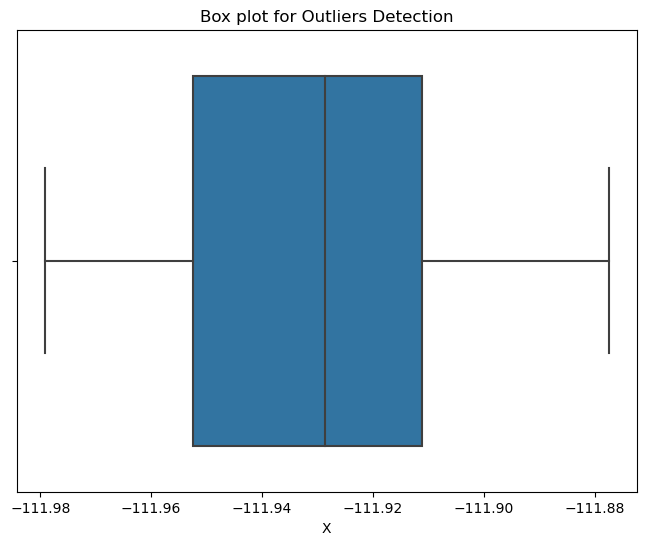

Column:  Y


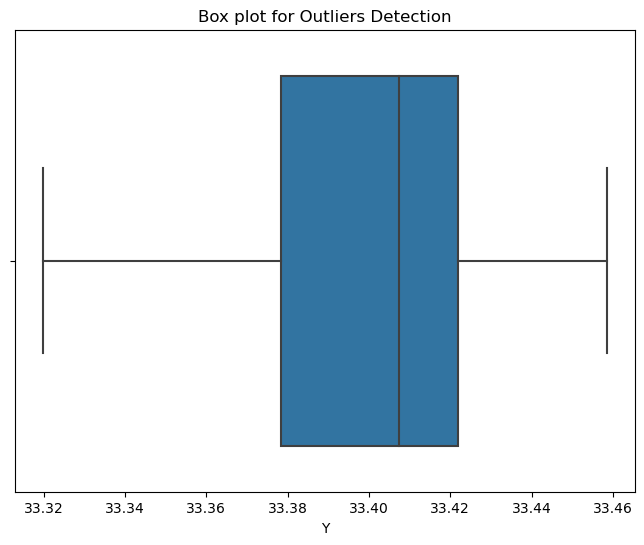

Column:  OBJECTID


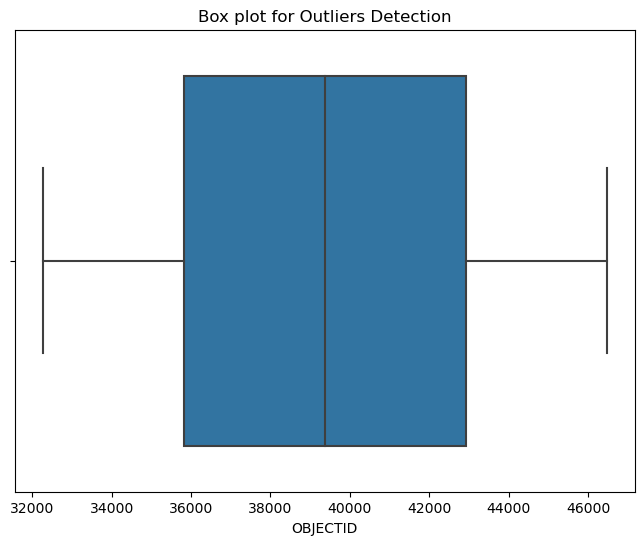

Column:  Incidentid


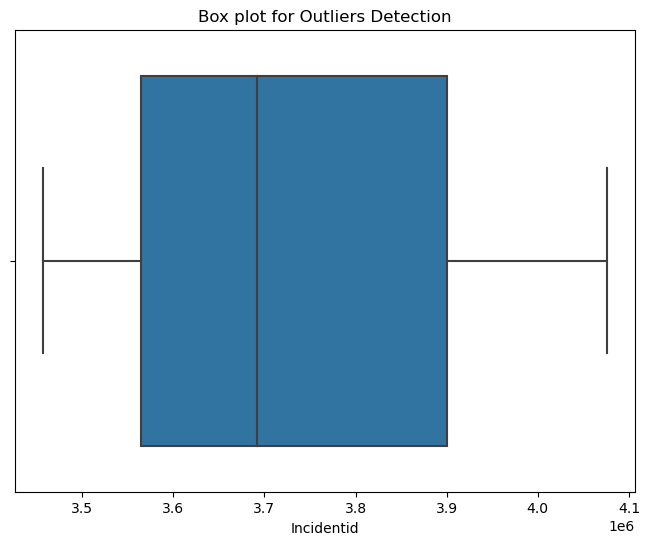

Column:  Year


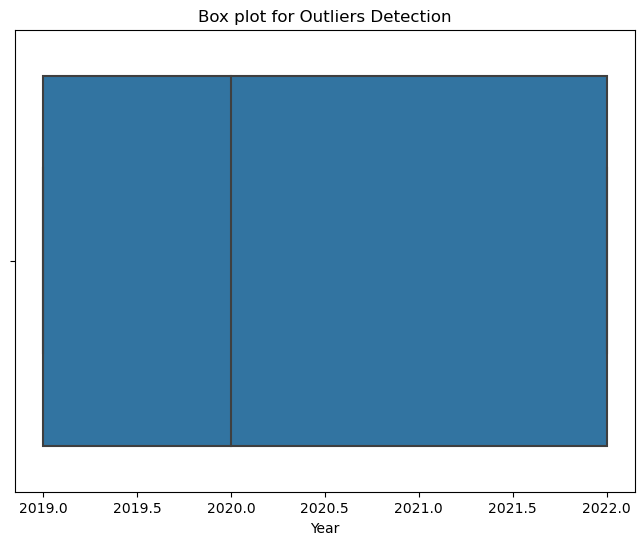

Column:  Distance


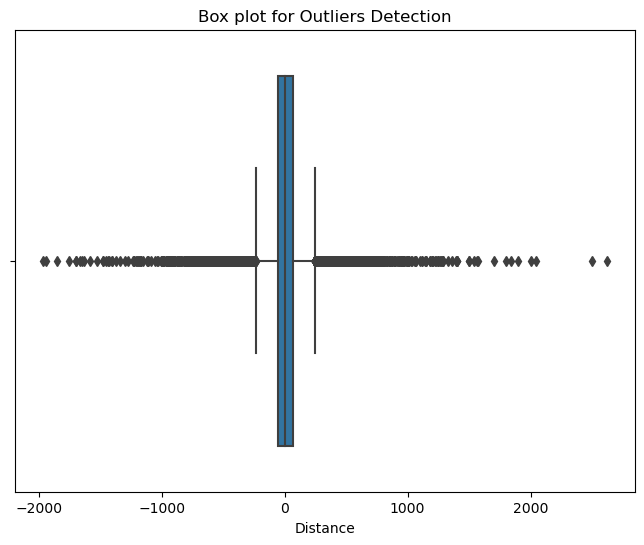

Column:  Totalinjuries


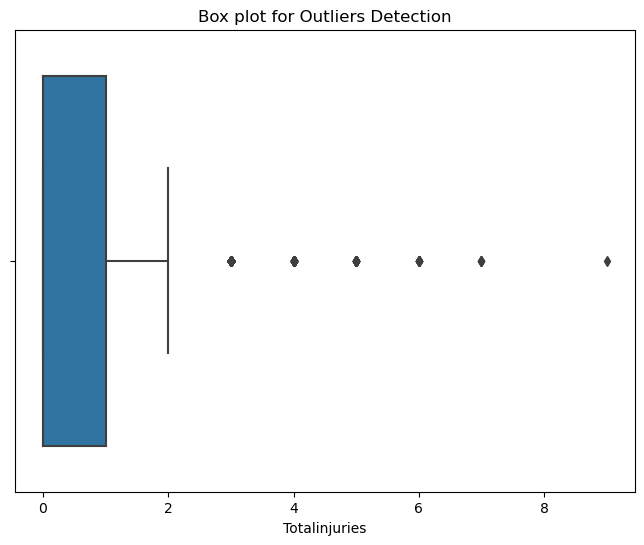

Column:  Totalfatalities


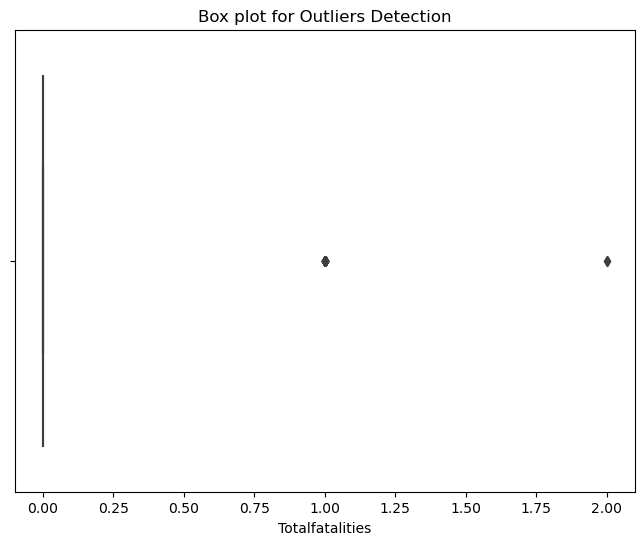

Column:  Age_Drv1


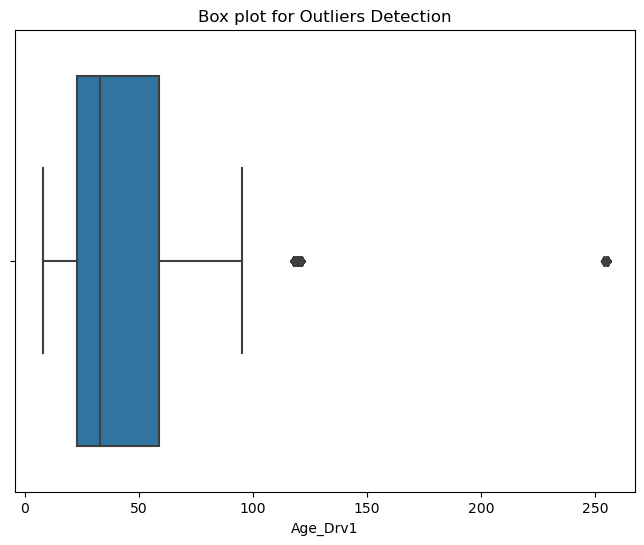

Column:  Age_Drv2


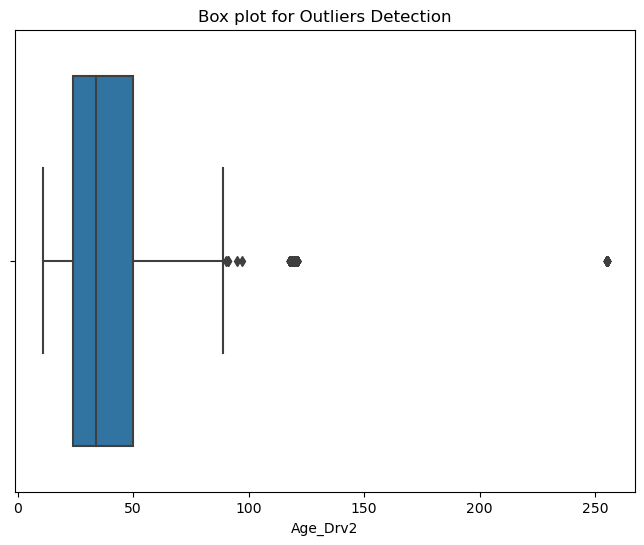

Column:  Latitude


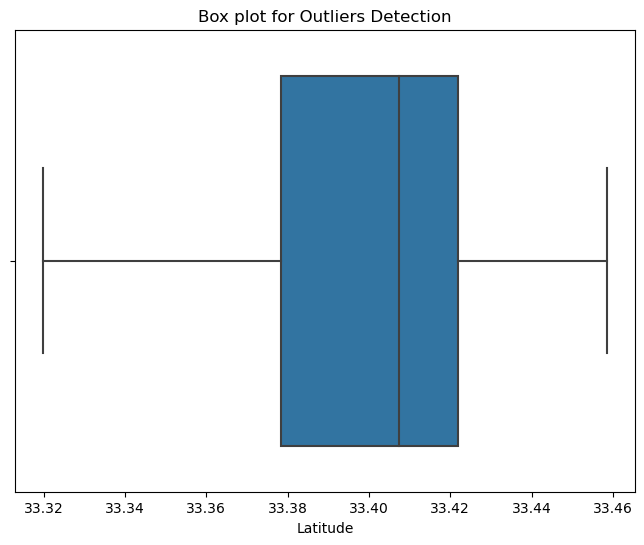

Column:  Longitude


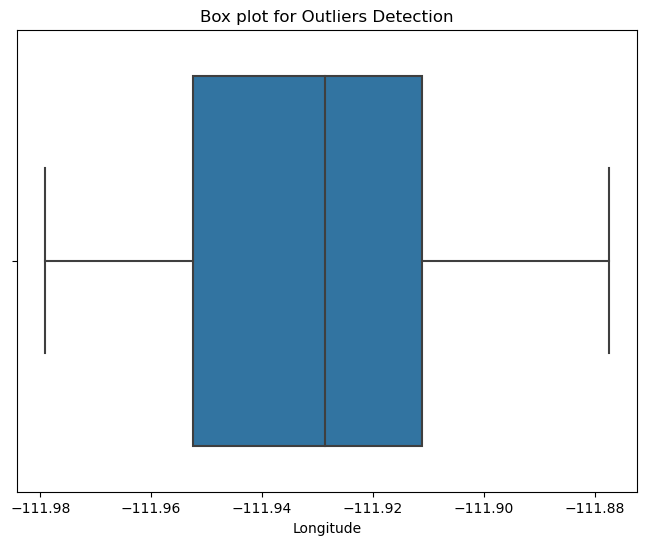

In [10]:
import seaborn as sns

#box plot for outliers
for col in specific_year.columns:
    if specific_year[col].dtypes != 'object':
        print("Column: ", col)
        plt.figure(figsize=(8,6))
        sns.boxplot(x = specific_year[col])
        plt.title('Box plot for Outliers Detection')
        plt.show()

# Data Cleaning:

#### Dropping all the unnecessary columns or duplicate columns like X and Y

In [11]:
specific_year = specific_year.drop(['X', 'Y', 'OBJECTID'], axis = 1)

In [12]:
accidents_df = specific_year[specific_year['Unittype_One'] == 'Driver'][specific_year['Unittype_Two'] == 'Driver']

In [13]:
accidents_df = accidents_df.drop(['Unittype_One', 'Unittype_Two'], axis = 1)

In [14]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            148
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1            213
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2             22
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [15]:
from scipy import stats

# Select only numeric columns
numeric_columns = accidents_df.select_dtypes(include=['int64', 'float64']).columns

# Function to detect and treat outliers
def detect_and_treat_outliers(data, column):
    # Calculate z-scores
    z_scores = stats.zscore(data[column])
    
    # Set a threshold for z-scores (e.g., 3)
    threshold = 3
    outliers = (abs(z_scores) > threshold)
    
    # Calculate IQR for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on IQR
    outliers |= (data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)

    # Drop rows with outliers
    data.drop(data[outliers].index, inplace=True)
    
    
# Iterate through numeric columns and detect/treat outliers
for column in numeric_columns:
    detect_and_treat_outliers(accidents_df, column)

# Now, df contains the DataFrame with outliers treated

In [16]:
accidents_df.describe()

,Incidentid,Year,Distance,Totalinjuries,Totalfatalities,Age_Drv1,Age_Drv2,Latitude,Longitude
count,7.590000e+03,7590.000000,7590.000000,7590.000000,7590.0,7590.000000,7590.000000,7590.000000,7590.000000
mean,3.716196e+06,2020.270883,2.214055,0.440843,0.0,35.649144,37.490250,33.398268,-111.933445
std,1.791775e+05,1.235860,84.836270,0.684999,0.0,16.587302,15.580009,0.029298,0.024983
min,3.457062e+06,2019.000000,-218.000000,0.000000,0.0,15.000000,16.000000,33.319863,-111.978419
25%,3.556764e+06,2019.000000,-25.000000,0.000000,0.0,22.000000,24.000000,33.378258,-111.955400
50%,3.667243e+06,2020.000000,0.000000,0.000000,0.0,30.000000,33.000000,33.407400,-111.928600
75%,3.892076e+06,2022.000000,30.000000,1.000000,0.0,47.000000,49.000000,33.421942,-111.911187
max,4.065538e+06,2022.000000,230.000000,2.000000,0.0,95.000000,89.000000,33.458490,-111.878282


In [17]:
accidents_df.isna().sum()

Incidentid               0
DateTime                 0
Year                     0
StreetName               0
CrossStreet            117
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Age_Drv1                 0
Gender_Drv1              0
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Age_Drv2                 0
Gender_Drv2              0
Traveldirection_Two      0
Unitaction_Two           0
Violation1_Drv2          0
AlcoholUse_Drv2          0
DrugUse_Drv2             0
Latitude                 0
Longitude                0
dtype: int64

In [18]:
accidents_df.shape

(7590, 30)

In [19]:
accidents_df['CrossStreet'].value_counts()

CrossStreet
McClintock Dr            292
Rural Rd                 289
Price Rd                 283
Broadway Rd              269
University Dr            264
                        ... 
I-10 Exit 153 C1-Ramp      1
Price Rd Non-Cardinal      1
Stadem Dr                  1
W Cottage Ln               1
SR-202 Exit 7 J-Ramp       1
Name: count, Length: 396, dtype: int64

In [20]:
#Imputing Unknown value for Crossstreet:
accidents_df['CrossStreet'].fillna('Unknown', inplace=True)

In [21]:
# Dropping the data of 
accidents_df.isna().sum()

Incidentid             0
DateTime               0
Year                   0
StreetName             0
CrossStreet            0
Distance               0
JunctionRelation       0
Totalinjuries          0
Totalfatalities        0
Injuryseverity         0
Collisionmanner        0
Lightcondition         0
Weather                0
SurfaceCondition       0
Age_Drv1               0
Gender_Drv1            0
Traveldirection_One    0
Unitaction_One         0
Violation1_Drv1        0
AlcoholUse_Drv1        0
DrugUse_Drv1           0
Age_Drv2               0
Gender_Drv2            0
Traveldirection_Two    0
Unitaction_Two         0
Violation1_Drv2        0
AlcoholUse_Drv2        0
DrugUse_Drv2           0
Latitude               0
Longitude              0
dtype: int64

# Data Preparation:

In [22]:
accidents_df.head()

,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32274,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015
32275,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738
32276,3478968,2019/01/02 01:14:00+00,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566
32277,3470739,2019/01/02 02:22:00+00,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926
32282,3470724,2019/01/02 18:54:00+00,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371


In [23]:
# Separating Data & Time columns 
accidents_df['DateTime'] = pd.to_datetime(accidents_df['DateTime'])

# Create a new columns for data and time
accidents_df['Date'] = accidents_df['DateTime'].dt.date
accidents_df['Time'] = accidents_df['DateTime'].dt.time

In [24]:
accidents_df = accidents_df.drop(['DateTime'], axis = 1)

In [25]:
accidents_df.head()

,Incidentid,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738,2019-01-01,18:39:00
32276,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566,2019-01-02,01:14:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371,2019-01-02,18:54:00


In [39]:
new_column_names= {
                    "Incidentid":"Incident_ID", 
                    "StreetName": "Street_Name", 
                    "CrossStreet": "Cross_Street", 
                    "JunctionRelation": "Junction_Relation", 
                    "Totalinjuries": "Total_Injuries", 
                    "Totalfatalities": "Total_Fatalities", 
                    "Injuryseverity": "Injury_Severity", 
                    "Collisionmanner": "Collision_Manner", 
                    "Lightcondition": "Light_Condition", 
                    "SurfaceCondition": "Surface_Condition", 
                    "Age_Drv1": "Age_1",
                    "Gender_Drv1": "Gender_1", 
                    "Traveldirection_One": "Travel_One", 
                    "Unitaction_One": "UnitAction_One", 
                    "Violation_Drv1": "Violation_1", 
                    "AlcoholUse_Drv1": "AlcoholUse_ 1", 
                    "DrugUse_Drv1": "DrugUse_1", 
                    "Age_Drv2": "Age_2", 
                    "Gender_Drv2": "Gender_2",
                    "Traveldirection_Two": "TravelDirection_2", 
                    "Unitaction_Two": "UnitAction_2", 
                    "Violation1_Drv2": "Violation_2", 
                    "AlcoholUse_Drv2": "AlcoholUse_2", 
                    "DrugUse_Drv2": "DrugUse_2"}

accidents_df.rename(columns=new_column_names, inplace=True)

accidents_df.head()

,Incident_ID,Year,Street_Name,Cross_Street,Distance,Junction_Relation,Total_Injuries,Total_Fatalities,Injury_Severity,Collision_Manner,Light_Condition,Weather,Surface_Condition,Age_1,Gender_1,Travel_One,UnitAction_One,Violation1_Drv1,AlcoholUse_ 1,DrugUse_1,Age_2,Gender_2,TravelDirection_2,UnitAction_2,Violation_2,AlcoholUse_2,DrugUse_2,Latitude,Longitude,Date,Time
32274,3462432,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,0.0,0.0,No Injury,Sideswipe Same Direction,Dark Lighted,Cloudy,Wet,36.0,Male,East,Changing Lanes,Failed To Keep In Proper Lane,No Apparent Influence,No Apparent Influence,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.40739,-111.94015,2019-01-01,12:24:00
32275,3470825,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Daylight,Rain,Dry,27.0,Male,North,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.37830,-111.96738,2019-01-01,18:39:00
32276,3478968,2019,University Dr,Rural Rd,200.0,Not Junction Related,0.0,0.0,No Injury,Left Turn,Dusk,Clear,Dry,28.0,Male,East,Making Left Turn,Failed To Yield Right Of Way,No Apparent Influence,No Apparent Influence,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42203,-111.92566,2019-01-02,01:14:00
32277,3470739,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,0.0,0.0,No Injury,Left Turn,Dark Lighted,Clear,Dry,72.0,Female,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.37842,-111.90926,2019-01-02,02:22:00
32282,3470724,2019,Baseline Rd,Price Rd,-29.0,Intersection Related 206,0.0,0.0,No Injury,Rear End,Daylight,Clear,Dry,36.0,Male,East,Making Right Turn,Followed Too Closely,No Apparent Influence,No Apparent Influence,62.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.37846,-111.89371,2019-01-02,18:54:00


In [41]:
accidents_df.to_csv('Cleaned_accidents_dataset.csv', index = False)